In [104]:
import os
import sys
import getopt
from enum import Enum
import json
import re
import bisect
import spacy
import string
import random
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import sklearn
from sklearn.manifold import TSNE
# import tsne
import numpy as np
# Use Spacy NLP
# IS_SPACY = True
# NLP = spacy.load('en')

In [105]:
INPUT_FOLDER = "D:\\FeatureTable\\bvt sentence sherlock holmes\\"
INPUT_FILE = INPUT_FOLDER + "FeatureTable-JobId-1467234184772-Epoch-4.csv"
AUX_COLUMN_SIZE = 4
AUX_COLUMN_NAMES = ['', 'wordID', 'word', 'count']
df = pd.read_csv(INPUT_FILE,header=None)
FEATURE_SIZE = len(df.columns) - AUX_COLUMN_SIZE
FEATURE_COLUMN_NAMES = ['embed' + str(i) for i in range(FEATURE_SIZE)]
COLUMN_NAMES = AUX_COLUMN_NAMES + FEATURE_COLUMN_NAMES
df.columns = COLUMN_NAMES

In [140]:
CORPUS_FOLDER = "D:\\data\\word2vec\\data\\"
CORPUS_FILE = CORPUS_FOLDER + "capital.txt"

In [143]:
def readVocabs(inputFile=CORPUS_FILE):
    words = set()
    with open(inputFile, 'r') as f:
        for line in f:
            for vocab in re.split('\\s', line):
                words.add(vocab.lower())
    return words
vocabs = readVocabs()
len(vocabs)

47

In [150]:
df[['count']].values[0][0]

2438287

In [151]:
X = []
y = []
count = []
j = 0
k = 0
for i, word in enumerate(df[['word']].values):
    if word[0] in vocabs:
        X.append(df[FEATURE_COLUMN_NAMES].values[i])
        y.append(word[0])
        count.append(df[['count']].values[i][0])
        j += 1
        if j % 25 == 0:
            print j, '/',
    k+=1
    if k-10000==0:
        print '***',k,'***'
        

25 / *** 10000 ***


In [ ]:
# X = [x for i, x in enumerate(df[FEATURE_COLUMN_NAMES].values) \
#     if i < 1000]
# y = [x[0] for i, x in enumerate(df[['word']].values) \
#     if i <1000]

<IPython.core.display.Javascript object>


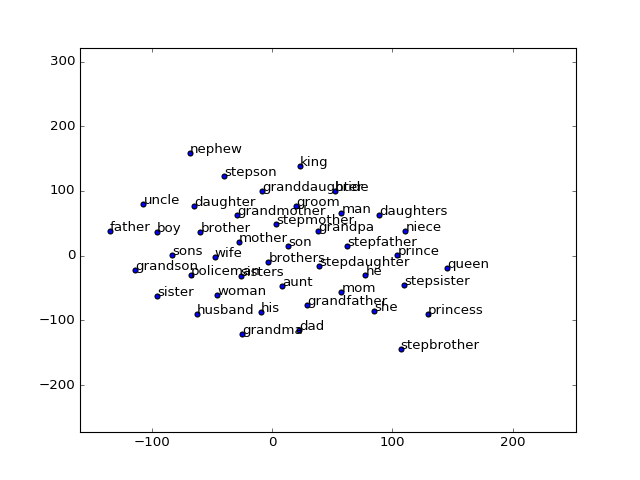

In [161]:
model = TSNE(n_components=2, random_state=2)
plt.figure()
np.set_printoptions(suppress=True)
vis = model.fit_transform(X)
plt.scatter(vis[:, 0], vis[:, 1])
for i, txt in enumerate(y):
    plt.annotate(txt, (vis[i, 0], vis[i, 1]))


<IPython.core.display.Javascript object>


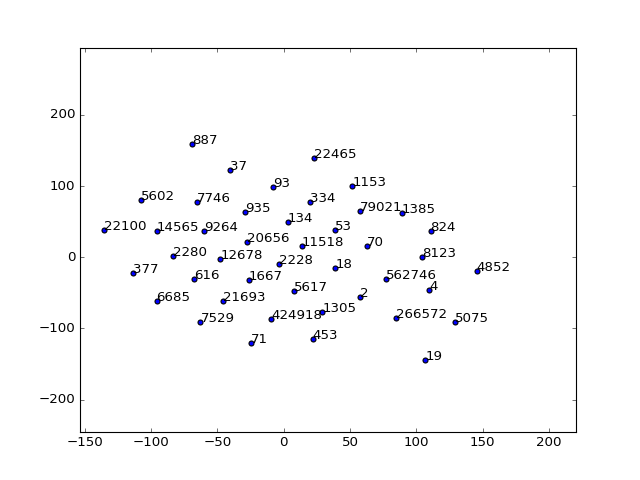

In [159]:
model = TSNE(n_components=2, random_state=2)
plt.figure()
np.set_printoptions(suppress=True)
vis = model.fit_transform(X)
plt.scatter(vis[:, 0], vis[:, 1])
for i, txt in enumerate(count):
    plt.annotate(txt, (vis[i, 0], vis[i, 1]))
